# Numpy - 2

### Numpy array vs Python lists

In [2]:
# speed
# list
a = [i for i in range(10000000)]
b = [i for i in range(10000000,20000000)]

c = []
import time 

start = time.time()
for i in range(len(a)):
  c.append(a[i] + b[i])
print(time.time()-start) # in seconds

2.0503761768341064


In [3]:
# numpy
import numpy as np
a = np.arange(10000000)
b = np.arange(10000000,20000000)

start = time.time()
c = a + b
print(time.time()-start)

0.10485100746154785


In [11]:
# memory
a = [i for i in range(10000000)]
import sys

sys.getsizeof(a)

81528048

In [13]:
a = np.arange(10000000,dtype=np.int8)
sys.getsizeof(a)

10000104

### Advanced Indexing

In [11]:
# Normal Indexing and slicing

a = np.arange(24).reshape(6,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [12]:
a[1,2]

6

In [20]:
# Fancy Indexing

a[:,[0,2,3]]

array([[ 0,  2,  3],
       [ 4,  6,  7],
       [ 8, 10, 11],
       [12, 14, 15],
       [16, 18, 19],
       [20, 22, 23]])

In [7]:
# Boolean Indexing
a = np.random.randint(1,100,24).reshape(6,4)
a

array([[49, 38, 20, 77],
       [72, 73, 42, 33],
       [92, 55, 94, 90],
       [17, 42,  1, 42],
       [14, 37, 21, 61],
       [95, 65, 70,  4]])

In [24]:
# find all numbers greater than 50
a[a > 5]

array([ 6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23])

In [22]:
# find out even numbers
a[a % 2 == 0]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22])

In [26]:
# find all numbers greater than 50 and are even

a[(a > 5) & (a % 2 == 0)]

array([ 6,  8, 10, 12, 14, 16, 18, 20, 22])

In [27]:
# find all numbers not divisible by 7
a[~(a % 7 == 0)]

array([ 1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12, 13, 15, 16, 17, 18, 19,
       20, 22, 23])

### Broadcasting

The term broadcasting describes how NumPy treats arrays with different shapes during arithmetic operations.

The smaller array is “broadcast” across the larger array so that they have compatible shapes.

#### Broadcasting Rules

**1. Make the two arrays have the same number of dimensions.**<br>
- If the numbers of dimensions of the two arrays are different, add new dimensions with size 1 to the head of the array with the smaller dimension.<br>

**2. Make each dimension of the two arrays the same size.**<br>
- If the sizes of each dimension of the two arrays do not match, dimensions with size 1 are stretched to the size of the other array.
- If there is a dimension whose size is not 1 in either of the two arrays, it cannot be broadcasted, and an error is raised.

<img src = "https://jakevdp.github.io/PythonDataScienceHandbook/figures/02.05-broadcasting.png">

In [28]:
# More examples

a = np.arange(12).reshape(4,3)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]
[0 1 2]
[[ 0  2  4]
 [ 3  5  7]
 [ 6  8 10]
 [ 9 11 13]]


In [29]:
a = np.arange(12).reshape(3,4)
b = np.arange(3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[0 1 2]


ValueError: operands could not be broadcast together with shapes (3,4) (3,) 

In [30]:
a = np.arange(3).reshape(1,3)
b = np.arange(3).reshape(3,1)

print(a)
print(b)

print(a+b)

[[0 1 2]]
[[0]
 [1]
 [2]]
[[0 1 2]
 [1 2 3]
 [2 3 4]]


In [31]:
a = np.array([1])
# shape -> (1,1)
b = np.arange(4).reshape(2,2)
# shape -> (2,2)

print(a)
print(b)

print(a+b)

[1]
[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [32]:
a = np.arange(12).reshape(3,4)
b = np.arange(12).reshape(4,3)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


ValueError: operands could not be broadcast together with shapes (3,4) (4,3) 

In [33]:
a = np.arange(16).reshape(4,4)
b = np.arange(4).reshape(2,2)

print(a)
print(b)

print(a+b)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]
[[0 1]
 [2 3]]


ValueError: operands could not be broadcast together with shapes (4,4) (2,2) 

### Working with mathematical formulas

In [34]:
a = np.arange(10)
np.sin(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

In [38]:
# sigmoid
def sigmoid(array):
  return 1/(1 + np.exp(-(array)))


a = np.arange(100)

sigmoid(a)

array([0.5       , 0.73105858, 0.88079708, 0.95257413, 0.98201379,
       0.99330715, 0.99752738, 0.99908895, 0.99966465, 0.99987661,
       0.9999546 , 0.9999833 , 0.99999386, 0.99999774, 0.99999917,
       0.99999969, 0.99999989, 0.99999996, 0.99999998, 0.99999999,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [36]:
# mean squared error

actual = np.random.randint(1,50,25)
predicted = np.random.randint(1,50,25)

In [37]:
def mse(actual,predicted):
  return np.mean((actual - predicted)**2)

mse(actual,predicted)

461.24

In [39]:
# binary cross entropy
np.mean((actual - predicted)**2)

461.24

### Working with missing values

In [40]:
# Working with missing values -> np.nan
a = np.array([1,2,3,4,np.nan,6])
a

array([ 1.,  2.,  3.,  4., nan,  6.])

In [49]:
# removing missing values
a[~np.isnan(a)]

array([1., 2., 3., 4., 6.])

### Plotting Graphs

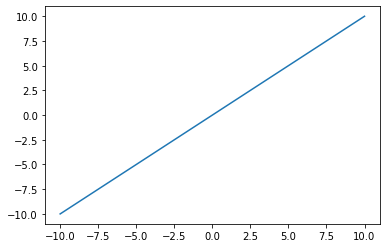

In [45]:
# plotting a 2D plot
# x = y
import matplotlib.pyplot as plt

x = np.linspace(-10,10,100)
y = x

plt.plot(x,y);

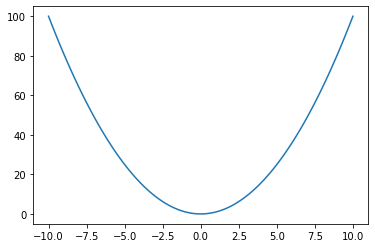

In [51]:
# y = x^2 parabola
x = np.linspace(-10,10,100)
y = x**2

plt.plot(x,y);

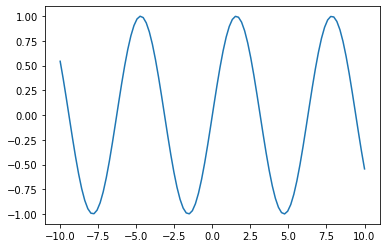

In [57]:
# y = sin(x)
x = np.linspace(-10,10,100)
y = np.sin(x)

plt.plot(x,y);

<ipython-input-55-6b6cb6aff77d>:3: RuntimeWarning: invalid value encountered in log
  y = x * np.log(x)


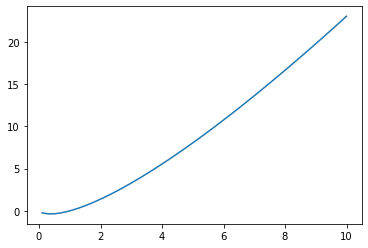

In [55]:
# y = xlog(x)
x = np.linspace(-10,10,100)
y = x * np.log(x)

plt.plot(x,y);

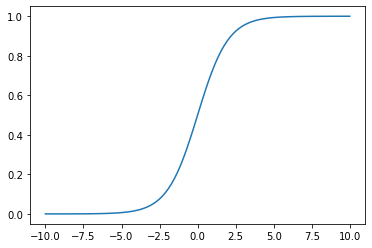

In [56]:
# sigmoid
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))

plt.plot(x,y);